In [1]:
from random import randint

In [2]:
bits =[]
for i in range(8):
    bit = randint(0,1)
    bits.append(bit)

In [3]:
bits

[0, 1, 1, 1, 0, 0, 0, 0]

In [4]:
from random import choice

In [5]:
basis = []
for i in range(8):
    base = choice(['X','Z'])
    basis.append(base)

In [6]:
basis

['X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'Z']

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(8)
c = ClassicalRegister(8)
qc = QuantumCircuit(q,c)

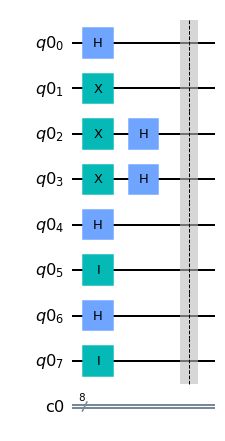

In [8]:
for i in range(8):
    if basis[i]=='Z':
        if bits[i]==0:
            qc.i(q[i])
        else:
            qc.x(q[i])
    else:
        if bits[i]==0:
            qc.h(q[i])
        else:
            qc.x(q[i])
            qc.h(q[i])
qc.barrier()
qc.draw('mpl')

In [9]:
bobs_base =[]
for i in range(8):
    base = choice(['X','Z'])
    bobs_base.append(base)

In [10]:
bobs_base

['Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z']

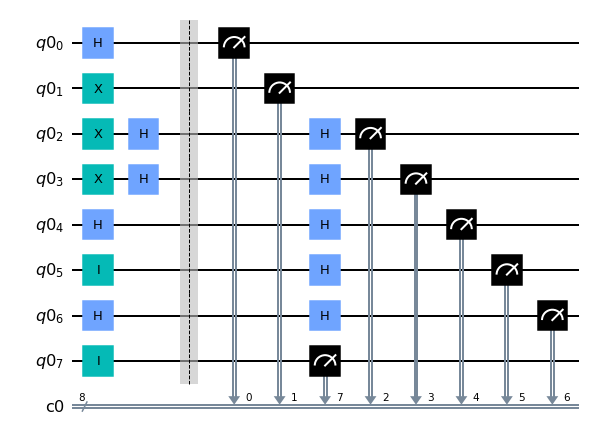

In [11]:
for i in range(8):
    if bobs_base[i]=='Z':
        qc.measure(q[i],c[i])
    else:
        qc.h(q[i])
        qc.measure(q[i],c[i])
qc.draw('mpl')

{'00001111': 1}


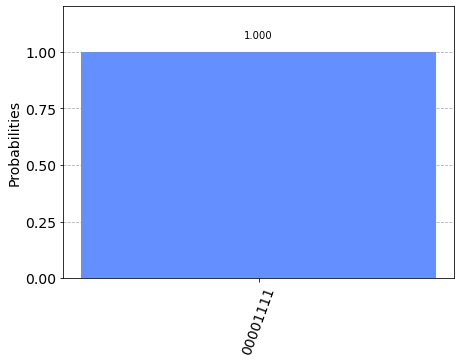

In [12]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [13]:
result = list(counts.keys())[0]

In [14]:
result

'00001111'

In [15]:
for i in range(8):
    if bobs_base[i]==basis[i]:
        print(result[i])

0
0
0
1
1
1
